In [12]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import  make_pipeline

# Pickle for saving model files
import pickle

# For standardization
from sklearn.preprocessing  import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [13]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,BUTTER,signal
0,0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,14298.486178,7940.694301,2.628526,2.680116,0.551041,1.0
1,1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,11553.163934,3904.681337,3.292504,3.085754,0.542637,1.0
2,2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,24081.196003,4738.891687,3.433676,3.121906,0.866271,1.0
3,3,14.286133,6.337556,227.375132,0.999806,6740.281614,0.347316,0.591884,0.306927,10593.207077,0.400748,11343.521945,3308.943750,2.291867,2.200712,-0.442550,0.0
4,4,60.474274,7.632751,106.730650,0.999905,5556.388794,0.204273,0.655850,0.196600,11801.249543,0.223101,25940.693317,4026.326871,3.290073,3.281829,-0.446607,0.0


In [39]:
data = data.drop(['Id'],axis=1)

In [8]:
data.head()

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,BUTTER,signal
0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,14298.486178,7940.694301,2.628526,2.680116,0.551041,1.0
1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,11553.163934,3904.681337,3.292504,3.085754,0.542637,1.0
2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,24081.196003,4738.891687,3.433676,3.121906,0.866271,1.0
3,14.286133,6.337556,227.375132,0.999806,6740.281614,0.347316,0.591884,0.306927,10593.207077,0.400748,11343.521945,3308.943750,2.291867,2.200712,-0.442550,0.0
4,60.474274,7.632751,106.730650,0.999905,5556.388794,0.204273,0.655850,0.196600,11801.249543,0.223101,25940.693317,4026.326871,3.290073,3.281829,-0.446607,0.0


In [10]:
data.describe()

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,BUTTER,signal
count,212662.000000,212662.000000,2.126620e+05,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000
mean,30.917255,2.831039,3.233108e+03,0.999962,9260.664335,0.573487,0.217185,0.581601,29740.464140,0.595178,23615.399265,5781.262866,3.149949,3.166745,0.334525,0.334004
std,15.392944,2.216654,1.498588e+04,0.000068,3997.768903,0.417256,0.484779,0.437939,19239.085505,0.460742,16424.509733,2669.985983,0.520862,0.527135,0.559604,0.471642
min,0.204442,0.000038,3.138746e+01,0.999500,2500.513932,0.200005,-0.799991,0.064412,3791.228140,0.053244,4952.118133,3000.031840,2.000000,2.000227,-1.249852,0.000000
25%,19.250309,0.925412,3.851386e+02,0.999961,6527.503234,0.289879,-0.170048,0.292138,15356.298104,0.294970,11921.223058,3887.726863,2.752651,2.760779,-0.094264,0.000000
50%,29.615744,2.287488,9.017917e+02,0.999989,8336.548930,0.429935,0.241336,0.436257,24379.336211,0.444553,18693.423754,4986.055993,3.128397,3.151240,0.200251,0.000000
75%,41.071903,4.426295,2.564877e+03,0.999998,11065.050625,0.703082,0.634683,0.713462,38994.138332,0.731249,30209.322530,6770.025065,3.526473,3.551590,0.806140,1.000000
max,108.067413,7.999920,1.971087e+06,1.000000,56327.186960,2.999445,0.999998,4.376841,99995.109721,4.439294,99982.936241,52715.201472,4.499751,4.499966,2.319382,1.000000


In [11]:
data.isnull().sum()

                   B_OWNPV_CHI2     0
                 B_IPCHI2_OWNPV     0
                 B_FDCHI2_OWNPV     0
                   B_DIRA_OWNPV     0
                           B_PT     0
             Kst_892_0_IP_OWNPV     0
            Kst_892_0_cosThetaH     0
                 Kplus_IP_OWNPV     0
                        Kplus_P     0
               piminus_IP_OWNPV     0
                      piminus_P     0
                       gamma_PT     0
                    piminus_ETA     0
                      Kplus_ETA     0
BUTTER                              0
signal                              0
dtype: int64

In [13]:
categorical = data.select_dtypes(include=['object']).columns.tolist()
categorical

[]

In [14]:
y = data['signal']
X = data.drop(['signal'],axis=1)

In [18]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size = 0.2,
                                                     random_state = 123, 
                                                     stratify = data['signal'])
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

170129 42533
170129 42533


In [22]:
# Pipeline dictionary
pipelines = {
#     'l1': make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2',random_state=123)),
    'l2': make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',random_state=123)),
    'rf': make_pipeline(StandardScaler(),
                        RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(),
                        GradientBoostingClassifier(random_state=123))
}

In [23]:
# Logistic Regression hyperparameters

l2_hyperparameters = {
    'logisticregression__C': np.linspace(1e-3,1e3,10)
}
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100,200],
    'randomforestclassifier__max_features': ['auto','sqrt',0.33]
}
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100,200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1,0.2],
    'gradientboostingclassifier__max_depth': [1,3,5]
}

# Create hyperparameters dictionary
hyperparameters = {'l1': l1_hyperparameters,
                  'l2': l2_hyperparameters,
                  'rf': rf_hyperparameters,
                  'gb': gb_hyperparameters}

In [24]:
# Create empty dictionary called fitted_models
fitted_models = {}
start_time = time.time()

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{0} has been fitted'.format(name))
print("--- %s seconds ---" % (time.time() - start_time))

l2 has been fitted
rf has been fitted
gb has been fitted
--- 6415.196279287338 seconds ---


In [26]:
106.91993/60


1.7819988333333332

In [27]:
# Display best_score_ for each fitted model
for name,model in fitted_models.items():
    print(name, "Score: ", model.best_score_)

l2 Score:  0.9647855509836883
rf Score:  0.9670955699510791
gb Score:  0.9681183200260588


In [28]:
for name,model in fitted_models.items():
    with open('model_'+name+'_final.pkl', 'wb') as f:
        pickle.dump(model.best_estimator_, f)

In [29]:
#Predict PROBABILITIES
pred = fitted_models['gb'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

In [30]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

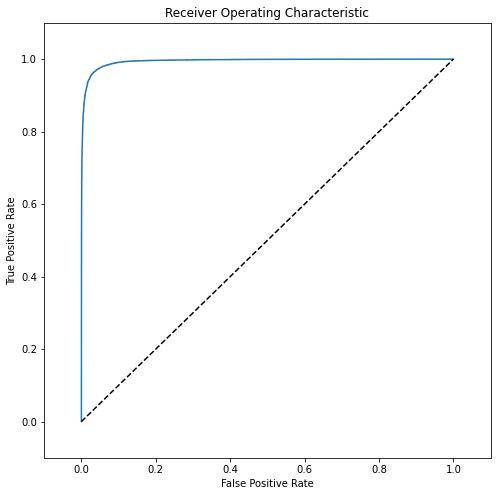

In [31]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
# Code here

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))

l2 0.9936579218261645
rf 0.9928963728098074
gb 0.9943552272004328


In [33]:
model = fitted_models['gb'].best_estimator_

In [34]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=123))])

In [35]:
a=list(zip(fitted_models['gb'].best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_,X_train))
a.sort()
for i in a:
    print(i)

(0.00018249212893594626, '                      piminus_P ')
(0.00020815273216566351, '                   B_OWNPV_CHI2 ')
(0.0003122329795960089, '                           B_PT ')
(0.00032333887821278716, '                       gamma_PT ')
(0.00045708621928280653, '                    piminus_ETA ')
(0.00047474872575130317, '                 Kplus_IP_OWNPV ')
(0.0006343647033839775, '               piminus_IP_OWNPV ')
(0.0006377196319030685, '                      Kplus_ETA ')
(0.0008554538919460462, '                   B_DIRA_OWNPV ')
(0.002005814181726559, '                 B_FDCHI2_OWNPV ')
(0.002188273251219201, '                        Kplus_P ')
(0.003254208352619662, '             Kst_892_0_IP_OWNPV ')
(0.004541074844180655, '                 B_IPCHI2_OWNPV ')
(0.010541690741548565, '            Kst_892_0_cosThetaH ')
(0.9733833487375279, 'BUTTER')


In [5]:
#Load
with open('2varModel_gb_finalNoButter.pkl', 'rb') as f:
    model = pickle.load(f)

In [6]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=1,
                                            n_estimators=300,
                                            random_state=123))])

In [ ]:
model.fit()

In [46]:
final = data.copy()

In [47]:
final

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,BUTTER,signal
0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,14298.486178,7940.694301,2.628526,2.680116,0.551041,1.0
1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,11553.163934,3904.681337,3.292504,3.085754,0.542637,1.0
2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,24081.196003,4738.891687,3.433676,3.121906,0.866271,1.0
3,14.286133,6.337556,227.375132,0.999806,6740.281614,0.347316,0.591884,0.306927,10593.207077,0.400748,11343.521945,3308.943750,2.291867,2.200712,-0.442550,0.0
4,60.474274,7.632751,106.730650,0.999905,5556.388794,0.204273,0.655850,0.196600,11801.249543,0.223101,25940.693317,4026.326871,3.290073,3.281829,-0.446607,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212657,33.269855,0.422886,528.518223,0.999999,6547.421388,0.324063,-0.397384,0.286336,50331.007785,0.539486,8898.424053,3657.986285,3.077444,3.243626,0.533516,1.0
212658,30.405409,6.838541,245.848798,0.999909,6634.286140,0.286608,0.522046,0.194381,32017.565715,0.446696,22491.555816,4975.574892,3.510440,3.603324,-0.132212,0.0
212659,8.028983,2.256855,377.706643,0.999878,5160.700365,0.626228,-0.176330,0.598550,16262.726940,0.705622,5497.144994,4276.250211,2.379503,2.772514,0.815462,1.0
212660,59.286201,3.385165,675.095332,0.999828,9506.037618,0.278407,0.948246,0.231088,11309.374549,0.308349,20879.660445,3915.660229,2.323603,2.348653,0.129525,0.0


In [43]:
pred = model.predict_proba(X_test)

In [45]:
pred['pred']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
test = pd.read_csv('test.csv')
test.head()

,Id,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,BUTTER
0,0,20.173445,3.846368,120.871099,0.999868,6160.068877,0.283769,0.784221,0.221518,14938.796613,0.334843,18885.484755,5739.899165,3.395456,3.520709,-0.453743
1,1,22.472050,3.463131,23290.089549,1.000000,4421.210474,2.289943,-0.755909,2.675985,27997.248030,1.512916,8658.765482,3511.829361,3.498786,3.427056,1.771229
2,2,13.758772,6.239888,2826.232845,0.999946,6271.957675,0.860737,0.321553,0.964498,8383.679923,0.846215,10310.459345,3211.637797,2.401201,2.224787,0.717621
3,3,39.320282,0.146056,992.465454,0.999998,7440.960902,0.485886,0.371864,0.457798,23595.091189,0.576270,13975.989410,5466.588206,3.203331,3.491705,2.412822
4,4,35.042408,3.912886,830.923177,0.999830,6120.895612,0.620750,0.325027,0.590861,6875.570461,0.721326,5065.980778,5250.449109,2.518374,2.190288,1.996316


In [8]:
test =test.drop(['Id','BUTTER'],axis=1)

In [9]:
test.shape

(141776, 14)

In [10]:
y = test['signal']
X = test.drop(['signal'],axis=1)

KeyError: 'signal'

In [11]:
model.fit(X,y)

NameError: name 'X' is not defined

In [53]:
a = model.predict_proba(test)

In [54]:
a

array([[0.99886587, 0.00113413],
       [0.0049923 , 0.9950077 ],
       [0.19845025, 0.80154975],
       ...,
       [0.9974808 , 0.0025192 ],
       [0.99872942, 0.00127058],
       [0.98344972, 0.01655028]])

In [55]:
a.shape

(141776, 2)

In [62]:
a[:,1].shape

(141776,)

In [67]:
df = pd.DataFrame({'Id':test['Id'],'Predicted':a[:,1]})

In [69]:
df.to_csv('FirstTry.csv',index=None)